In [1]:
%load_ext autoreload
%autoreload 2
import doctest
import music
from music import scale, chord, test_m37chords

doctest.testmod(music)

TestResults(failed=0, attempted=12)

In [119]:
dminor = scale('Dbm')
dminor.scale

[2, 1, 2, 2, 1, 2, 2]

In [96]:
m37 = chord.get_m37chords(chord)

In [104]:
c1 = chord.name2chord(chord.chord2name(m37[-1]))

In [8]:
chord.index2step_1d(chord.name2chord('Am'))

['A', 'C', 'E']

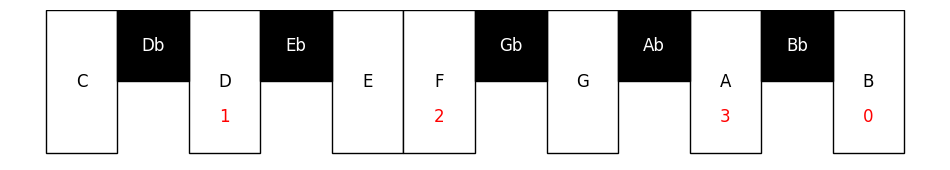

Scale Steps:  ['B', 'D', 'F', 'A']


In [105]:
chord.plot_chord(c1)

## MUSIC21

In [1]:
from music21 import scale, pitch, note, chord, harmony, stream
from typing import Union
import inspect
# us = environment.UserSettings()
# us['musescoreDirectPNGPath'] = 'D:\\apps\\musescore\\bin\\MuseScore4.exe'
# us['musescoreDirectPNGPath'] = 'D:\\apps\\musescore\\bin\\MuseScore4.exe

C-major triad
['C4', 'E4', 'G4']


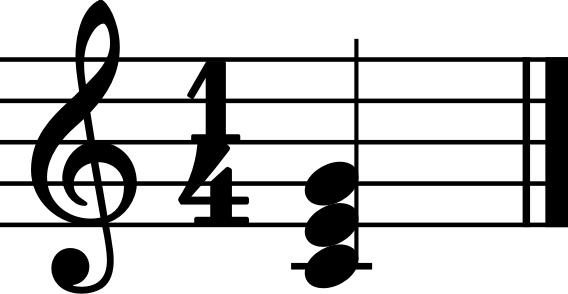

In [38]:
# 60 = 12 * 5 (-1 -> 4)
ch = chord.Chord([60, 64, 67])
print(ch.pitchedCommonName)
print([p.nameWithOctave for p in ch.pitches])
ch.show(dpi=600)

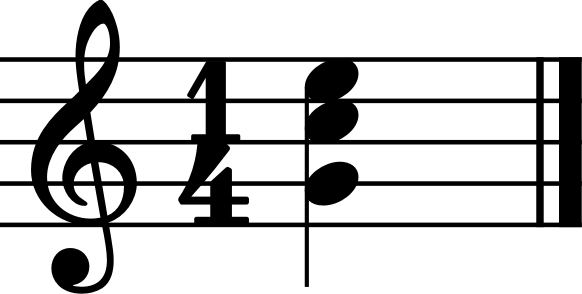

In [40]:
ch.inversion(2)
ch.show(dpi=600)

In [48]:
ch.pitches

tuple

Text representation of the score:
{0.0} <music21.stream.Part 0x2018fc12830>
    {0.0} <music21.instrument.Piano 'Piano'>
    {0.0} <music21.chord.Chord C4 E4 G4>
    {1.0} <music21.chord.Chord E4 G4 C5>
    {2.0} <music21.chord.Chord G4 C5 E5>
{3.0} <music21.stream.Part 0x2018fc136d0>
    {0.0} <music21.instrument.Piano 'Piano'>
    {0.0} <music21.note.Note C>
None
Music notation:


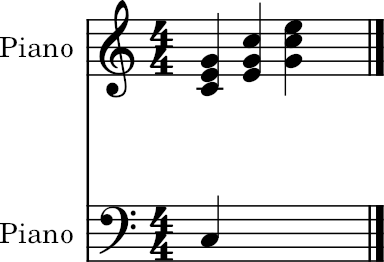

In [10]:
from music21 import note, chord, stream, instrument

# Define the root note for the left hand
root_note = note.Note('C3')  # Middle C for the left hand

# Define the original chord and create inversions for the right hand
original_chord = chord.Chord(['C4', 'E4', 'G4'])
first_inversion = chord.Chord(['C4', 'E4', 'G4'])
first_inversion.inversion(1)
second_inversion = chord.Chord(['C4', 'E4', 'G4'])
second_inversion.inversion(2)

# Create separate parts for left hand and right hand
left_hand = stream.Part()
right_hand = stream.Part()

# Assign instruments to the parts (optional)
left_hand.append(instrument.Piano())
right_hand.append(instrument.Piano())

# Add the root note to the left hand part
left_hand.append(root_note)

# Add the chord inversions to the right hand part
right_hand.append(original_chord)
right_hand.append(first_inversion)
right_hand.append(second_inversion)

# Combine the parts into a single stream
score = stream.Score()
score.append(right_hand)
score.append(left_hand)

# Show the score in text and music notation
print("Text representation of the score:")
print(score.show('text'))

print("Music notation:")
score.show()


In [11]:
from music21 import chord, key, scale, roman

# Define the set of pitches
pitches = ['C4', 'D4', 'E4']

# Create a chord from these pitches
ch = chord.Chord(pitches)
print("Chord Pitches:", ch.pitches)

# Define the keys
c_major = key.Key('C')
g_major = key.Key('G')

# Analyze in C major
c_major_analysis = [roman.romanNumeralFromChord(ch, c_major)]
print("Analysis in C Major:", c_major_analysis)

# Analyze in G major
g_major_analysis = [roman.romanNumeralFromChord(ch, g_major)]
print("Analysis in G Major:", g_major_analysis)


Chord Pitches: (<music21.pitch.Pitch C4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch E4>)
Analysis in C Major: [<music21.roman.RomanNumeral I32 in C major>]
Analysis in G Major: [<music21.roman.RomanNumeral IV32 in G major>]


In [24]:
type(c_major.getScale())

music21.scale.MajorScale

In [26]:
def chord_enumerate(key_name: str):
    _key = key.Key(key_name)
    scale_key = _key.getChord()
    print(scale_key.pitchNames)

    # Initiate a new list to store the chords
    chords = []

    for i in range(7):

        # The triad diatonic chord 
        ch1 = _key.getChord()[i]
        ch2 = _key.getChord()[(i+2)%7]
        ch3 = _key.getChord()[(i+4)%7]
        # check octave upgrade
        if i+2 > 6:
            ch2.octave += 1
        if i+4 > 6:
            ch3.octave += 1
        chords.append(chord.Chord([ch1, ch2, ch3]))

    for ch in chords:
        rn = roman.romanNumeralFromChord(ch, _key)
        print(f"{ch.pitchNames} -> {rn.figure}")

In [137]:
chord_enumerate('C')

['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']
['C', 'E', 'G'] -> I
['D', 'F', 'A'] -> ii
['E', 'G', 'B'] -> iii
['F', 'A', 'C'] -> IV
['G', 'B', 'D'] -> V
['A', 'C', 'E'] -> vi
['B', 'D', 'F'] -> viio
